# Bayesian Hypothesis Testing for comparing LeBron James and Anthony Davis's points scored per game.

Amos Colombo, Christian Pala

## Libraries:

In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import arviz as az
import seaborn as sns
from pathlib import Path
from scipy.stats import halfnorm
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme()
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
np.random.seed(44)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Note: based on professor Corani's notebook: Bayesian-t-test, presented during the course lectures.

## Preprocessing

Load the data

In [116]:
df = pd.read_pickle(Path('..', 'data', 'dataset.pkl'))
df.head()

,PLAYER_ID,PLAYER_NAME,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,2544.0,LeBron James,"[3.114, 15.114, 3.114, 0.114, 8.114, 0.114, 13...","[15.114, 3.114, 0.114, 8.114, 0.114, 13.114, 1...","[3.114, 0.114, 8.114, 0.114, 13.114, 1.114, 5....","[0.114, 8.114, 0.114, 13.114, 1.114, 5.114, 1....","[8.114, 0.114, 13.114, 1.114, 5.114, 1.114, -9...","[0.114, 13.114, 1.114, 5.114, 1.114, -9.886, 4...","[13.114, 1.114, 5.114, 1.114, -9.886, 4.114, -...","[1.114, 5.114, 1.114, -9.886, 4.114, -8.886, 1...",...,23.0,29.0,33.0,30.0,23.0,25.0,33.0,29.0,23.0,13.0
1,201935.0,James Harden,"[5.114, -3.886, 8.114, 2.114, 11.114, -7.886, ...","[-3.886, 8.114, 2.114, 11.114, -7.886, 7.114, ...","[8.114, 2.114, 11.114, -7.886, 7.114, 6.114, 7...","[2.114, 11.114, -7.886, 7.114, 6.114, 7.114, 1...","[11.114, -7.886, 7.114, 6.114, 7.114, 13.114, ...","[-7.886, 7.114, 6.114, 7.114, 13.114, -3.886, ...","[7.114, 6.114, 7.114, 13.114, -3.886, 12.114, ...","[6.114, 7.114, 13.114, -3.886, 12.114, 2.114, ...",...,44.0,47.0,39.0,42.0,36.0,44.0,29.0,36.0,59.0,29.0
2,203076.0,Anthony Davis,"[-5.886, 3.114, -2.886, -9.886, 7.114, 9.114, ...","[3.114, -2.886, -9.886, 7.114, 9.114, 2.114, 9...","[-2.886, -9.886, 7.114, 9.114, 2.114, 9.114, 2...","[-9.886, 7.114, 9.114, 2.114, 9.114, 2.114, 6....","[7.114, 9.114, 2.114, 9.114, 2.114, 6.114, 12....","[9.114, 2.114, 9.114, 2.114, 6.114, 12.114, -1...","[2.114, 9.114, 2.114, 6.114, 12.114, -11.886, ...","[9.114, 2.114, 6.114, 12.114, -11.886, 4.114, ...",...,33.0,34.0,14.0,17.0,24.0,27.0,26.0,15.0,25.0,40.0
3,203999.0,Nikola Jokic,"[-4.886, -8.886, -2.886, 5.114, -3.886, -8.886...","[-8.886, -2.886, 5.114, -3.886, -8.886, 9.114,...","[-2.886, 5.114, -3.886, -8.886, 9.114, -2.886,...","[5.114, -3.886, -8.886, 9.114, -2.886, 1.114, ...","[-3.886, -8.886, 9.114, -2.886, 1.114, 7.114, ...","[-8.886, 9.114, -2.886, 1.114, 7.114, 1.114, -...","[9.114, -2.886, 1.114, 7.114, 1.114, -9.886, 5...","[-2.886, 1.114, 7.114, 1.114, -9.886, 5.114, -...",...,28.0,20.0,15.0,24.0,30.0,6.0,13.0,7.0,8.0,18.0
4,1627750.0,Jamal Murray,"[-5.886, 7.114, 3.114, 0.114, -3.886, 15.114, ...","[7.114, 3.114, 0.114, -3.886, 15.114, -3.886, ...","[3.114, 0.114, -3.886, 15.114, -3.886, 1.114, ...","[0.114, -3.886, 15.114, -3.886, 1.114, -6.886,...","[-3.886, 15.114, -3.886, 1.114, -6.886, -10.88...","[15.114, -3.886, 1.114, -6.886, -10.886, 2.114...","[-3.886, 1.114, -6.886, -10.886, 2.114, -12.88...","[1.114, -6.886, -10.886, 2.114, -12.886, -7.88...",...,22.0,21.0,22.0,14.0,16.0,18.0,27.0,14.0,4.0,9.0


In [117]:
# select LeBron James, Anthony Davis for our first hypotheses test.
df_1 = df[df['PLAYER_NAME'].isin(['LeBron James', 'Anthony Davis'])].copy()
df_1.head()

,PLAYER_ID,PLAYER_NAME,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,2544.0,LeBron James,"[3.114, 15.114, 3.114, 0.114, 8.114, 0.114, 13...","[15.114, 3.114, 0.114, 8.114, 0.114, 13.114, 1...","[3.114, 0.114, 8.114, 0.114, 13.114, 1.114, 5....","[0.114, 8.114, 0.114, 13.114, 1.114, 5.114, 1....","[8.114, 0.114, 13.114, 1.114, 5.114, 1.114, -9...","[0.114, 13.114, 1.114, 5.114, 1.114, -9.886, 4...","[13.114, 1.114, 5.114, 1.114, -9.886, 4.114, -...","[1.114, 5.114, 1.114, -9.886, 4.114, -8.886, 1...",...,23.0,29.0,33.0,30.0,23.0,25.0,33.0,29.0,23.0,13.0
2,203076.0,Anthony Davis,"[-5.886, 3.114, -2.886, -9.886, 7.114, 9.114, ...","[3.114, -2.886, -9.886, 7.114, 9.114, 2.114, 9...","[-2.886, -9.886, 7.114, 9.114, 2.114, 9.114, 2...","[-9.886, 7.114, 9.114, 2.114, 9.114, 2.114, 6....","[7.114, 9.114, 2.114, 9.114, 2.114, 6.114, 12....","[9.114, 2.114, 9.114, 2.114, 6.114, 12.114, -1...","[2.114, 9.114, 2.114, 6.114, 12.114, -11.886, ...","[9.114, 2.114, 6.114, 12.114, -11.886, 4.114, ...",...,33.0,34.0,14.0,17.0,24.0,27.0,26.0,15.0,25.0,40.0


Preprocess the data for pymc3

In [118]:
# select columns 43-83
df_1 = df_1.iloc[:, 43:84]

# cast to float numpy arrays for pymc3
points_lj = df_1.iloc[0, :].values
points_ad = df_1.iloc[1, :].values
points_lj = np.array(points_lj, dtype=float)
points_ad = np.array(points_ad, dtype=float)

## Hypotheses test 1

We compare the points scored per game by LeBron James and Anthony Davis, two of the most prolific scorers.

$H_0$: $\mu_{lj} = \mu_{ad}$
$H_A$: $\mu_{lj} \neq \mu_{ad}$




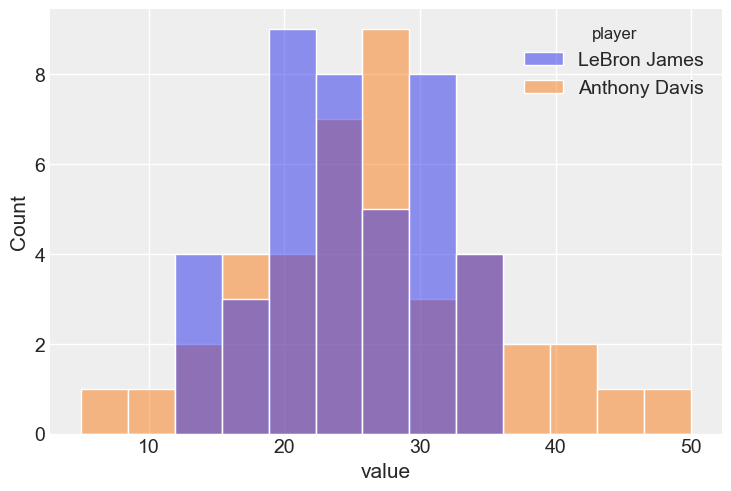

In [119]:
y  = pd.DataFrame(dict(value=np.r_[points_lj, points_ad], player=np.r_[["LeBron James"]*len(points_lj), ['Anthony Davis']*len(points_ad)]))
sns.histplot(data=y, x="value", hue="player", bins=13);

In [120]:
print(f"Sample mean points Anthony Davis: {np.mean(points_ad):.3f}")
print(f"Sample mean points LeBron James: {np.mean(points_lj):.3f}")

Sample mean points Anthony Davis: 26.488
Sample mean points LeBron James: 24.756


# Research questions

* From a visual inspection and computation the sampled mean of points per game is superior for Anthony Davis, but:

    * there is a lot of variability within games
    * there may be outliers, especially for Anthony Davis.

We want to have a more detailed breakdown, namely:

* Is the expected points per game credibly higher for Anthony Davis? In other words, can we reject the hypothesis that the two players have equal means?
* Which is the probability of Anthony Davis scoring more points in a game than LeBron James?
* If there is a difference, is it significant?
* If there is a difference between means, can we expect a large, a medium or a low difference in the points per game?

Note: we assume the distribution is normal, although it's clearly an approximation.

# Setup

* We have two samples, from which we can compute:

    * observed means, also known as sample means: ($\bar{y}_{\text{ad}$, $\bar{y}_{\text{lj}}$)

    * sample standard deviations ($s_{\text{ad}}, s_{\text{lj}}$)

    * numerosity ($n_{\text{ad}}, n_{\text{lj}}$)


* The sample are drawn from two populations with unknown parameters $\mu_{\text{ad}}, \mu_{\text{lj}}, \sigma_{\text{ad}}, \sigma_{\text{lj}}$.

# Background information to set the prior

* <a href="https://www.basketball-reference.com/leagues/NBA_stats_per_game.html"> Prior reference </a> The average points per player in the NBA for the season 2019-2020 was 111.8, with 13 players per roster and rounding to a meaningful value that turns out to be 9 points per game as the average.
* Since we have a dataset with information on all active players in the 2019-2020 season, we also compute both mean and standard deviation, the average is pretty close in both cases, so we went with 9.
* A reasonable prior for $\mu$ is a value between 3 and 16 from our research, both interpreting this as an interval of $\pm 2 \sigma$ around the mean and looking at the standard deviation in the dataset, we assume $\mu$'s standard deviation to be around 4.

In [121]:
priors = pd.read_csv(Path('..', 'data', 'prior_information.csv'))
mu = priors["mean"]
sigma = priors["std"]
print(f"Difference in average points between reference value and empirical 2019-2020 value from the dataset: {float(111.8/13 - mu.values):.3f}")
print(f"Prior standard deviation: {float(sigma):.3f}")

Difference in average points between reference value and empirical 2019-2020 value from the dataset: 0.615
Prior standard deviation: 4.641


# Prior for $\mu_{\text{lj}}$ and $\mu_{\text{ad}}$

$$
\mu_{\text{ad}}   \sim  N (9, 4)
$$
$$
\mu_{\text{lj}}   \sim  N (9, 4)
$$

* We assign the same priors to both players, so that we are not favoring a group over another a priori.
* extreme values of points per game are 0 and 50, so for the half normal we have: (9 - 0)/2 = 4.5 if we take the left tail under consideration. Here we noticed modelling the points per game as a normal distribution is wrong, but for the purporse of this test with a normal model, we ignore the asymmetry of the right tail, and assume the distribution is symmetric.

In [122]:
# Here we tune the half-normal prior for sigma, adjusting the scale to have the median close to 4.5
# this yields a  diffuse prior, but still defined over plausible range.
pd.DataFrame(halfnorm.rvs(scale=6.8, size=10000)).describe()

,0
count,10000.000000
mean,5.460386
std,4.112976
min,0.001129
25%,2.223320
50%,4.624313
75%,7.824404
max,26.017234


* Assuming a Gaussian distribution of the observations,  we have:

$$\vec{y}_{ad} \sim N(\mu_{\text{ad}}, \sigma_{\text{ad}})$$

$$\vec{y}_{lj} \sim N(\mu_{\text{lj}}, \sigma_{\text{lj}})$$


where we use the vector notation to make it clear that these are array of measures.

#  The probabilistic model

* In this case it makes sense to treat  $\sigma_i$ for the variability of points scored differently for each player.

\begin{align*}
\mu_{\text{ad}} & \sim N(9,4) \\
\sigma_{\text{ad}} & \sim \text{half-normal} (6.8) \\
\vec{y}_{\text{ad}}  & \sim N(\mu_{\text{ad}}, \sigma_{\text{ad}})\\
\\
\mu_{\text{lj}} & \sim N(9,4) \\
\sigma_{\text{lj}} & \sim \text{half-normal} (6.8) \\
\vec{y}_{\text{lj}}  & \sim N(\mu_{\text{lj}}, \sigma_{\text{lj}}) \\
\end{align*}


# Comparing two means $\mu_{ad}$ and $\mu_{lj}$

We consider  the difference between the means of the populations:
$$\mu_{ad} - \mu_{lj}$$

* We save ($\mu_{ad} - \mu_{lj}$) in the trace as a deterministic parameter.

In [123]:
with pm.Model() as  normal_model:
    # priors
    mu_ad = pm.Normal('mu_ad', mu=9, sd=4)
    mu_lj = pm.Normal('mu_lj', mu=9, sd=4)
    sigma_ad = pm.HalfNormal('sigma_ad', sigma=6.8)
    sigma_lj = pm.HalfNormal('sigma_lj', sigma=6.8)

    # likelihood of player Anthony Davis
    y_ad = pm.Normal('y_ad',  mu=mu_ad, sigma=sigma_ad, observed= points_ad)

    # likelihood of player LeBron James
    y_lj = pm.Normal('y_lj', mu=mu_lj, sigma=sigma_lj, observed= points_lj)

    # deterministic variable of interest
    diff_of_means = pm.Deterministic('diff_of_means', mu_ad - mu_lj)

In [124]:
with normal_model:
    normal_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_lj, sigma_ad, mu_lj, mu_ad]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 156 seconds.


# Checking convergence

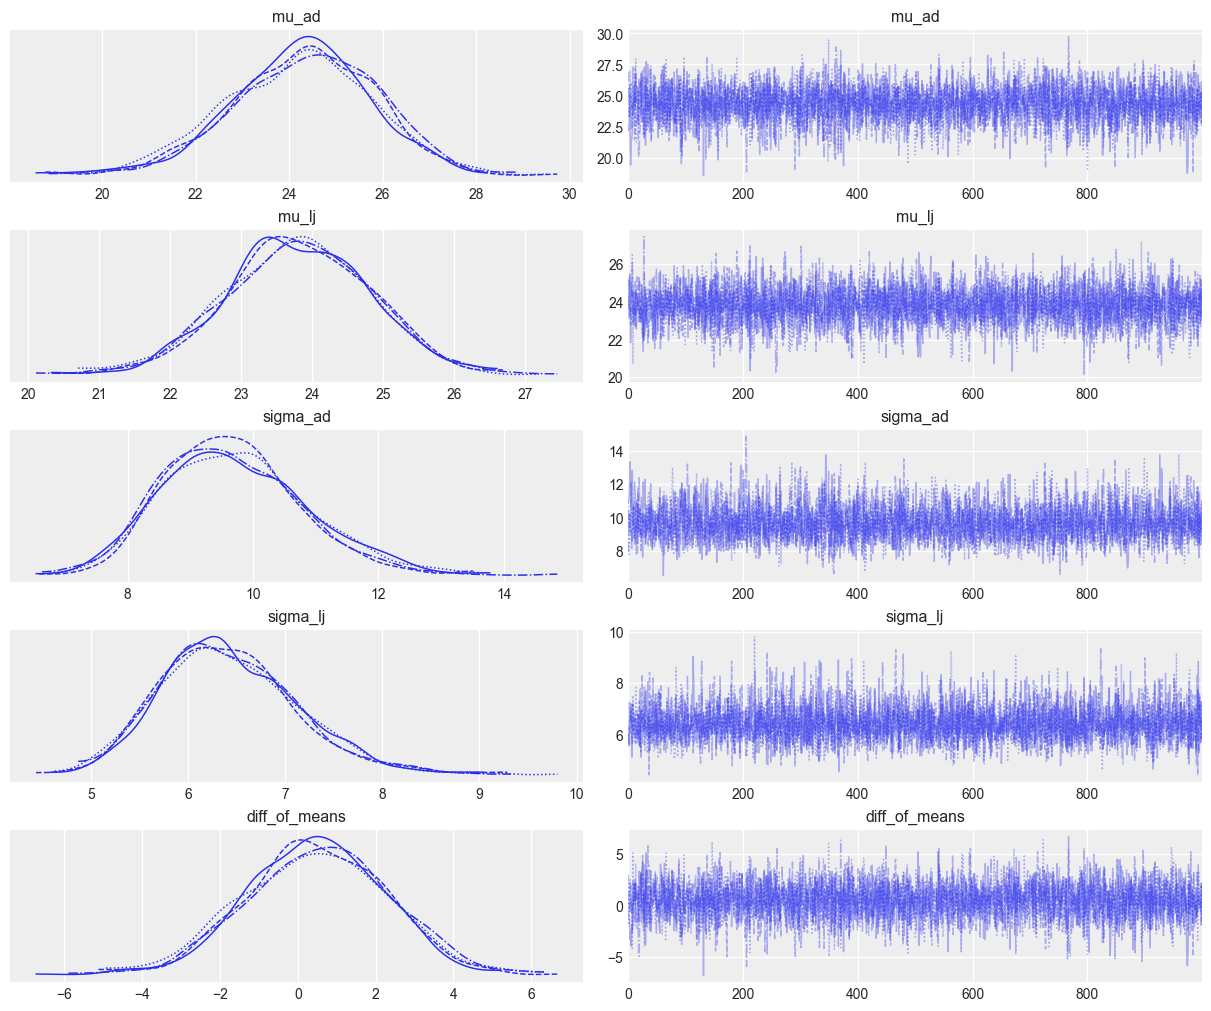

In [125]:
#sampling was good. The posterior of sigma is very similar for both groups, while there are differences in  the posterior mean of the two groups.
az.plot_trace(normal_trace);

We see no problem with the convergence.

## Question 1:

In [126]:
az.summary(normal_trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_ad,24.277,1.523,21.336,27.212,0.024,0.017,4151.0,2972.0,1.0
mu_lj,23.806,1.010,21.799,25.684,0.015,0.010,4668.0,3069.0,1.0
sigma_ad,9.686,1.114,7.619,11.896,0.018,0.013,3988.0,2538.0,1.0
sigma_lj,6.426,0.716,5.104,7.827,0.010,0.007,5455.0,3225.0,1.0
diff_of_means,0.471,1.818,-3.073,3.817,0.027,0.026,4555.0,3203.0,1.0


Since 0 is in the 95% HDI interval, we cannot reject the hypothesis that the two means are equal.

## Question 2:

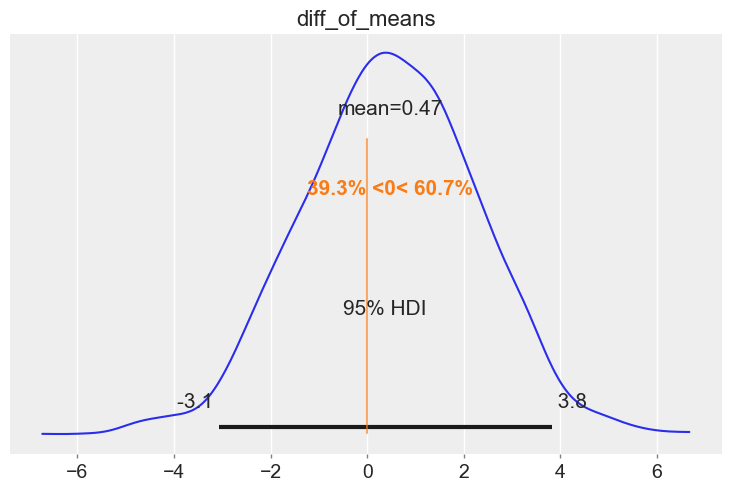

In [127]:
az.plot_posterior(normal_trace,  var_names="diff_of_means", ref_val=0, hdi_prob=0.95);

The probability of Anthony Davis scoring more points than LeBron is 59.5%, hence we expect Anthony Davis to occasionally score more than LeBron.

## Question 3:

In basketball a difference of 1 point is almost irrelevant, as the minimum score for a hoop is 2, what happens if we assume a difference of 1 between the two means is neglible?

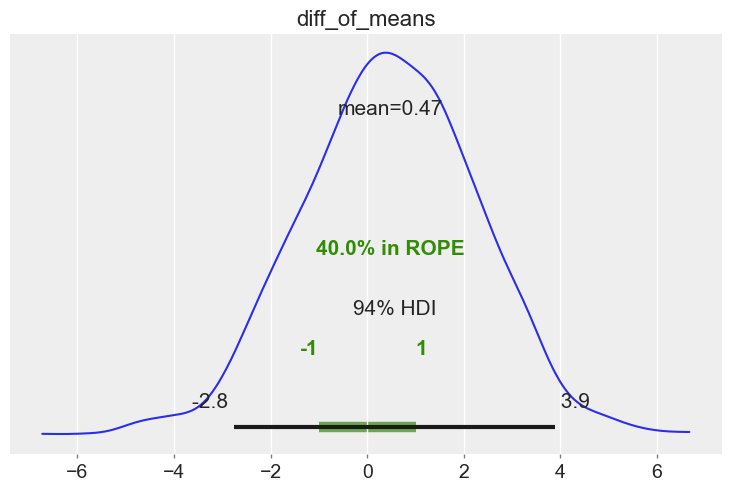

In [159]:
az.plot_posterior(normal_trace,  var_names="diff_of_means", rope=(-1, 1));

There is a reasonable probability that the performance between the two players w.r.t. to scoring ends up being basically the same.

We classify a large difference as making more than 5 points more on average, a medium difference with scoring at least one hoop more and not exceeding our large definition, less than a hoop we consider to be a small difference.

In [129]:
samples = az.extract_dataset(normal_trace,)
diff_samples = samples.diff_of_means.values
p_significant_large = ((diff_samples > 5).sum() ) / len(diff_samples)
p_significant_medium = (np.logical_and(diff_samples > 2, diff_samples < 5).sum()) / len(diff_samples)
p_significant_small = 1 -  p_significant_medium  -  p_significant_large

print(f"p(large point difference) = {p_significant_large:.3f}")
print(f"p(medium point difference) = {p_significant_medium:.3f}")
print(f"p(small point difference): = {p_significant_small:.3f}")

p(large point difference) = 0.006
p(medium point difference) = 0.196
p(small point difference): = 0.798


From the tests we conclude it's reasonable to expect a very similar points per game between Anthony Davis and LeBron james, with a few games where Anthony Davis scores more.

# Posterior predictive checks

C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


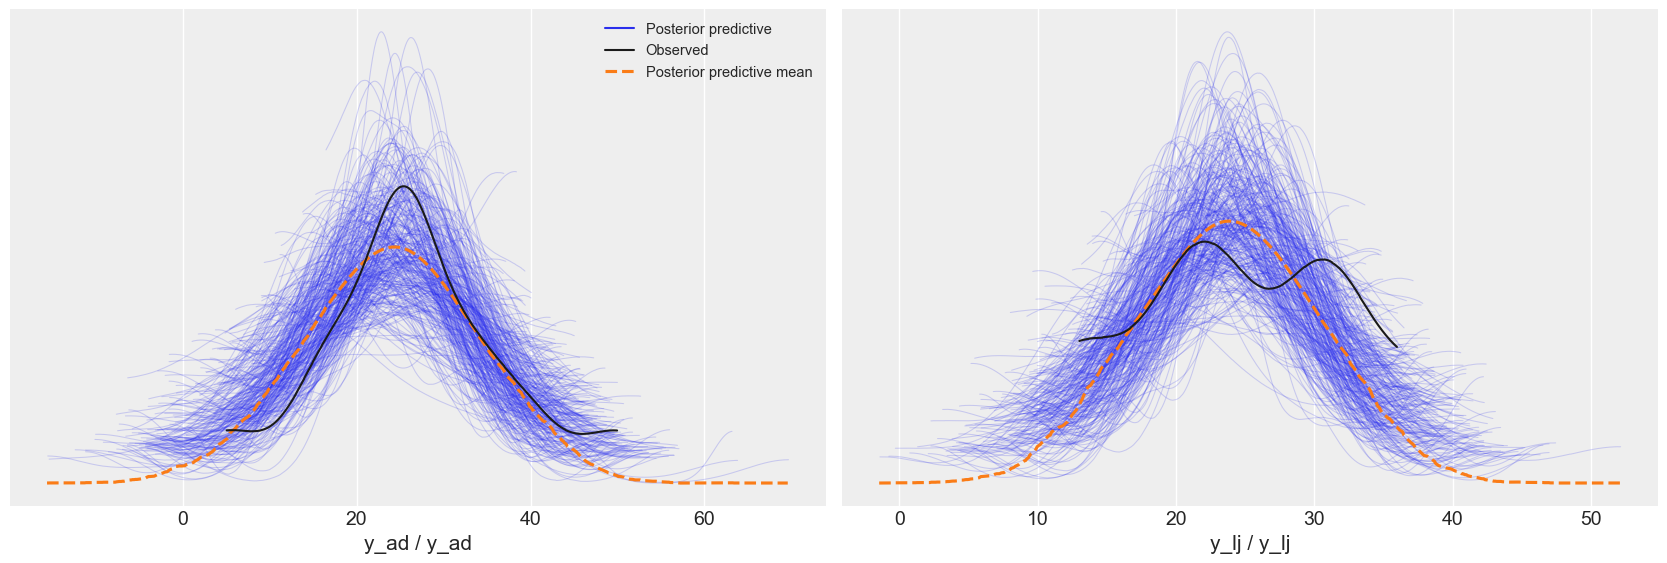

In [130]:
with normal_model:
     ppc = pm.sample_posterior_predictive(normal_trace, samples=300)

# The density is too low in the bulk of the distribution, for both groups. IS THIS TRUE FOR US?
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=normal_model));

It seems like the normal distribution is not too bad of an approximation, despite the symmetry assumption we made on the right tail.

## Prior sensitivity

In [151]:
with pm.Model() as  normal_model_sensitivity:
    # priors
    # check uninformative priors with a large range.
    mu_ad = pm.Uniform('mu_ad', lower=0, upper=40)
    mu_lj = pm.Uniform('mu_lj', lower=0, upper=40)
    # model heavier tails with the half cauchy
    sigma_ad = pm.HalfCauchy('sigma_ad', beta=6.8)
    sigma_lj = pm.HalfCauchy('sigma_lj', beta=6.8)

    # likelihood of player Anthony Davis
    y_ad = pm.Normal('y_ad',  mu=mu_ad, sigma=sigma_ad, observed= points_ad)

    # likelihood of player LeBron James
    y_lj = pm.Normal('y_lj', mu=mu_lj, sigma=sigma_lj, observed= points_lj)

    # deterministic variable of interest
    diff_of_means = pm.Deterministic('diff_of_means', mu_ad - mu_lj)

In [152]:
# sample
with normal_model_sensitivity:
    normal_sensitivity_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_lj, sigma_ad, mu_lj, mu_ad]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 171 seconds.


## Convergence of the alternative priors

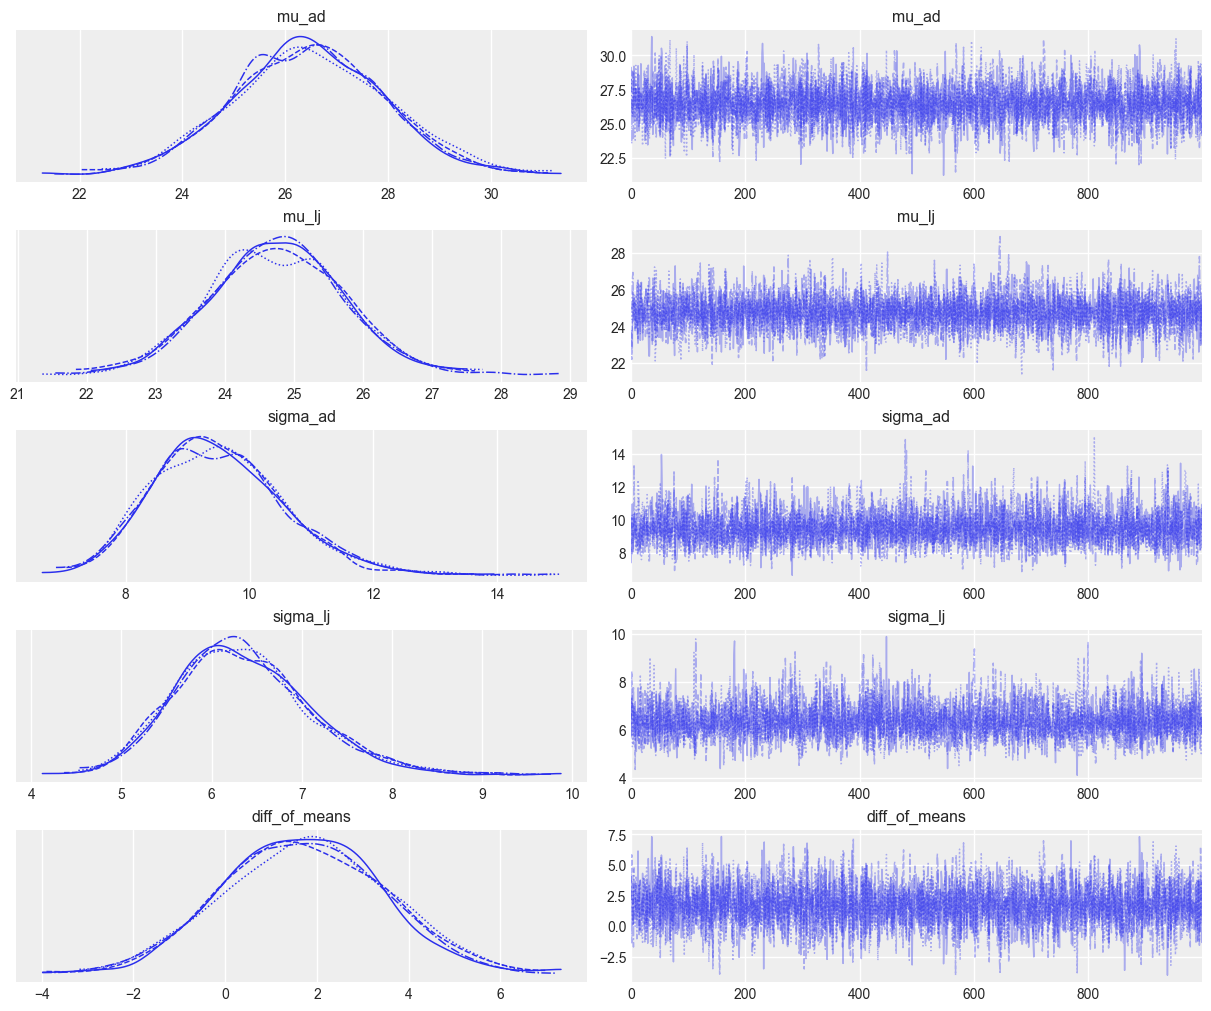

In [153]:
az.plot_trace(normal_sensitivity_trace);

## Results under modified assumption

In [154]:
az.summary(normal_sensitivity_trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_ad,26.466,1.477,23.746,29.490,0.020,0.014,5621.0,2936.0,1.0
mu_lj,24.755,0.965,22.958,26.732,0.014,0.010,5003.0,3017.0,1.0
sigma_ad,9.509,1.057,7.559,11.540,0.015,0.011,4898.0,3202.0,1.0
sigma_lj,6.353,0.752,4.963,7.853,0.011,0.008,4934.0,2436.0,1.0
diff_of_means,1.711,1.769,-1.746,5.077,0.025,0.022,5091.0,2991.0,1.0


Once again we cannot discard the null-hypothesis of both means being equal, so given how broad the priors we set are in this case, this conclusion seems quite robust.

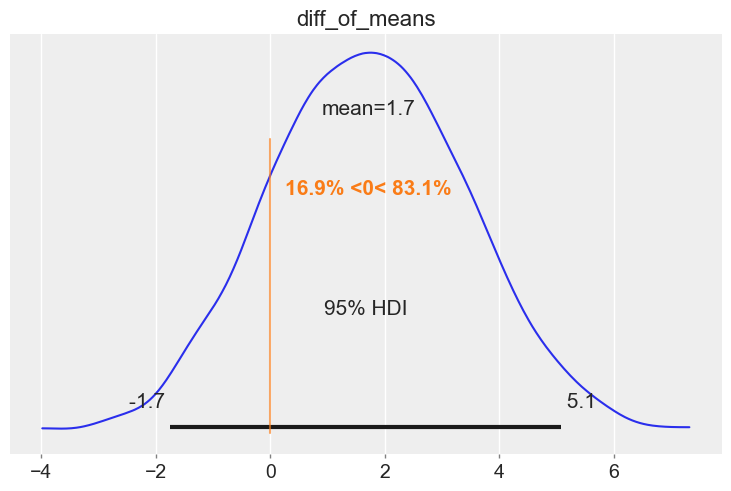

In [155]:
az.plot_posterior(normal_sensitivity_trace,  var_names="diff_of_means", ref_val=0, hdi_prob=0.95);

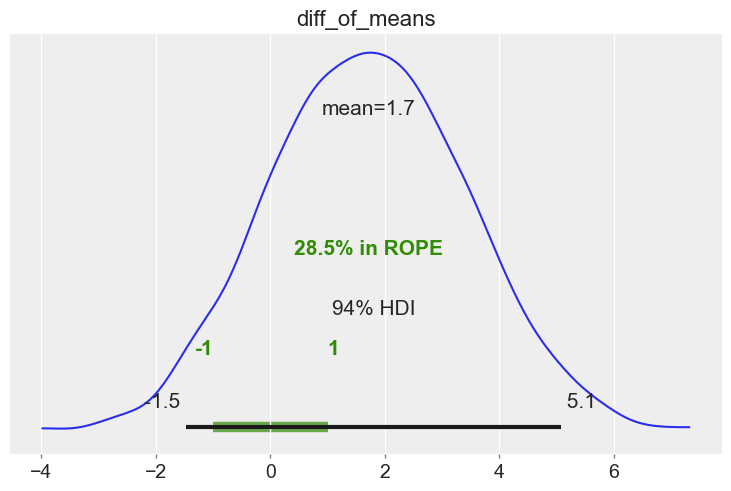

In [160]:
az.plot_posterior(normal_sensitivity_trace,  var_names="diff_of_means", rope=(-1, 1));

In [161]:
samples = az.extract_dataset(normal_sensitivity_trace,)
diff_samples = samples.diff_of_means.values
p_significant_large = ((diff_samples > 5).sum() ) / len(diff_samples)
p_significant_medium = (np.logical_and(diff_samples > 2, diff_samples < 5).sum()) / len(diff_samples)
p_significant_small = 1 -  p_significant_medium  -  p_significant_large

print(f"p(large point difference) = {p_significant_large:.3f}")
print(f"p(medium point difference) = {p_significant_medium:.3f}")
print(f"p(small point difference): = {p_significant_small:.3f}")

p(large point difference) = 0.033
p(medium point difference) = 0.402
p(small point difference): = 0.565


With a more detailed break-down, using less informative priors we get closer to the results from the log-normal case. Although it's plausible that Davis and James have the same mean score, it's more likely for Davis to score more with an 80:20 ratio.

## Predictive check

C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


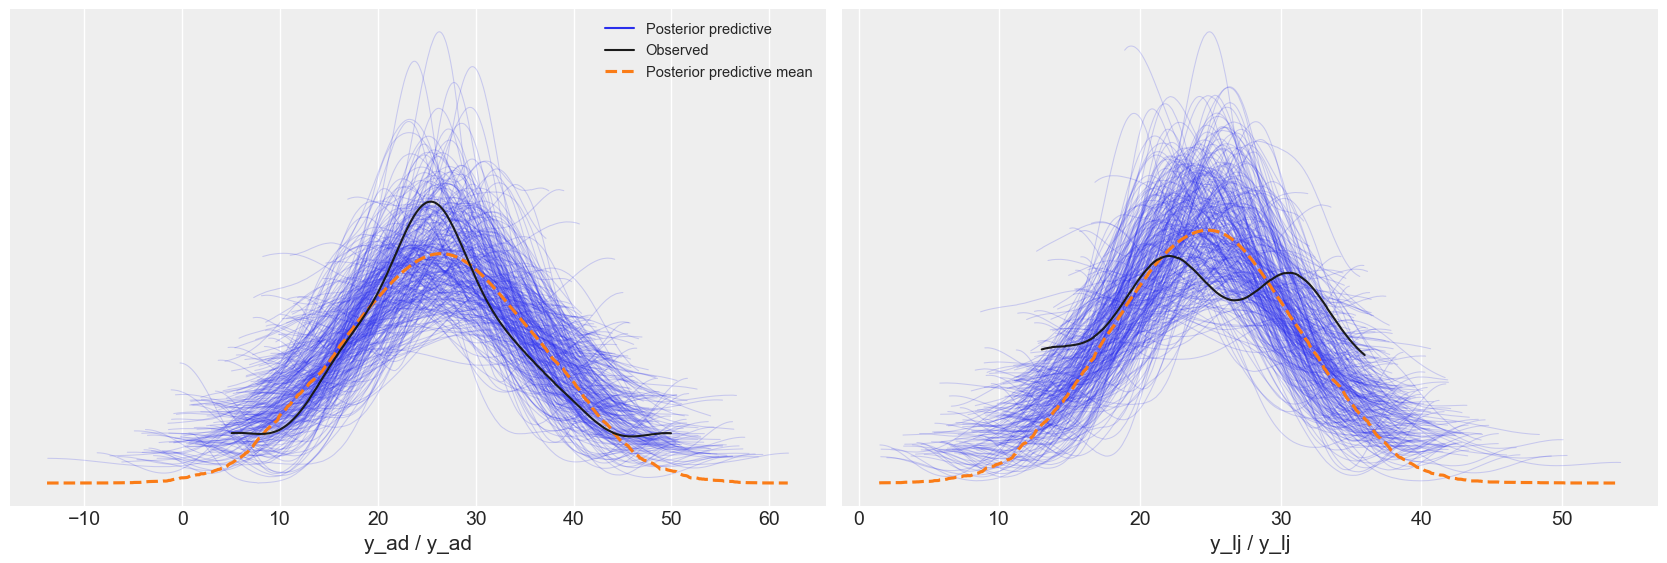

In [162]:
with normal_model_sensitivity:
     ppc = pm.sample_posterior_predictive(normal_sensitivity_trace, samples=300)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=normal_model_sensitivity));

## Hypotheses test 2

We compare the points scored per game by Nikola Jokic, as a center,  compared to the mean of the players in other positions

$H_0$: $\mu_{nj} = \mu_{\text{oth_nba_pos}}$
$H_A$: $\mu_{nj} \neq \mu_{\text{oth_nba_pos}}$

Preprocess the data

In [163]:
df_2 = df.iloc[:, 43:84].copy()
df_2.head()

,43,44,45,46,47,48,49,50,51,52,...,74,75,76,77,78,79,80,81,82,83
0,17.0,22.0,18.0,36.0,15.0,22.0,29.0,27.0,21.0,15.0,...,23.0,29.0,33.0,30.0,23.0,25.0,33.0,29.0,23.0,13.0
1,12.0,27.0,29.0,34.0,13.0,41.0,32.0,17.0,41.0,44.0,...,44.0,47.0,39.0,42.0,36.0,44.0,29.0,36.0,59.0,29.0
2,25.0,27.0,32.0,18.0,21.0,37.0,31.0,16.0,28.0,9.0,...,33.0,34.0,14.0,17.0,24.0,27.0,26.0,15.0,25.0,40.0
3,22.0,19.0,23.0,30.0,29.0,39.0,15.0,28.0,25.0,24.0,...,28.0,20.0,15.0,24.0,30.0,6.0,13.0,7.0,8.0,18.0
4,19.0,24.0,14.0,16.0,39.0,22.0,12.0,13.0,15.0,8.0,...,22.0,21.0,22.0,14.0,16.0,18.0,27.0,14.0,4.0,9.0


In [164]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    df_other = df_2.drop(3, axis = 0).dropna()
    points_avg = np.array(df.mean()[1:].values, dtype=float)
    points_nj = df_2.iloc[3, :].values
    points_nj = np.array(points_nj, dtype=float)

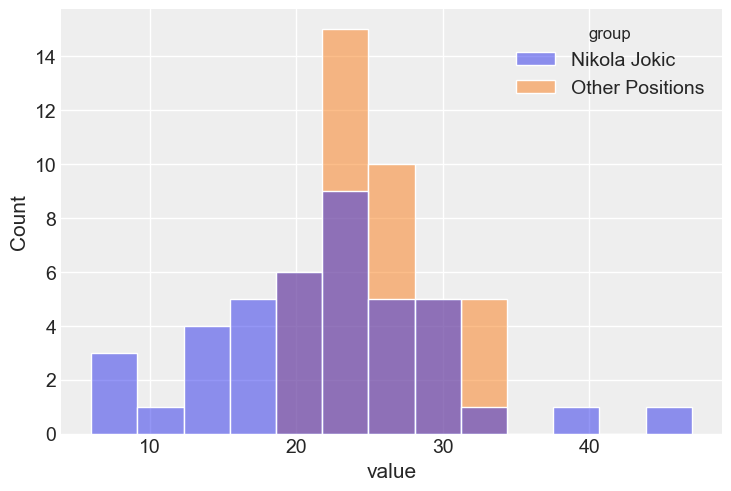

In [165]:
y  = pd.DataFrame(dict(value=np.r_[points_nj, points_avg], group=np.r_[["Nikola Jokic"]*len(points_nj), ['Other Positions']*len(points_avg)]))
sns.histplot(data=y, x="value", hue="group", bins=13);

In [166]:
print(f"Sample mean points Nikola Jokic: {np.mean(points_nj):.3f}")
print(f"Sample mean points for the other roles: {np.mean(points_avg):.3f}")

Sample mean points Nikola Jokic: 22.024
Sample mean points for the other roles: 25.405


We can keep the same setup and research questions from our first test, since we already tested the log-normal model for that case and obtained similar results, we proceed with the modelling approximating with a normal distribution:

In [167]:
with pm.Model() as normal_model_2:
    # priors
    mu_nj = pm.Normal('mu_nj', mu=9, sd=4)
    mu_avg = pm.Normal('mu_avg', mu=9, sd=4)
    sigma_nj = pm.HalfNormal('sigma_nj', sigma=6.8)
    sigma_avg = pm.HalfNormal('sigma_avg', sigma=6.8)

    # likelihood of player Nikola Jokic
    y_nj = pm.Normal('y_nj', mu=mu_nj, sigma=sigma_nj, observed=points_nj)

    # likelihood of an average player, not playing as a center:
    y_avg = pm.Normal('y_avg', mu=mu_avg, sigma=sigma_avg, observed=points_avg)

    # deterministic variable of interest
    diff_of_means = pm.Deterministic('diff_of_means', mu_nj - mu_avg)

In [168]:
with normal_model_2:
    normal_trace_2 = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_avg, sigma_nj, mu_avg, mu_nj]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 149 seconds.


In [171]:
az.summary(normal_trace_2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_nj,20.786,1.278,18.374,23.437,0.018,0.013,4810.0,3043.0,1.0
mu_avg,24.997,0.656,23.722,26.268,0.011,0.008,3878.0,2761.0,1.0
sigma_nj,8.307,0.954,6.546,10.187,0.013,0.010,5341.0,2731.0,1.0
sigma_avg,4.055,0.485,3.154,4.996,0.008,0.006,4092.0,2706.0,1.0
diff_of_means,-4.210,1.451,-6.925,-1.221,0.022,0.016,4318.0,2751.0,1.0


Since 0 is not in the 95% HDI interval, we reject the hypothesis that the two means are equal.

We would have obtained the same result with traditional hypothesis test, but now we that we have modelled the situation we can infer more detailed information.

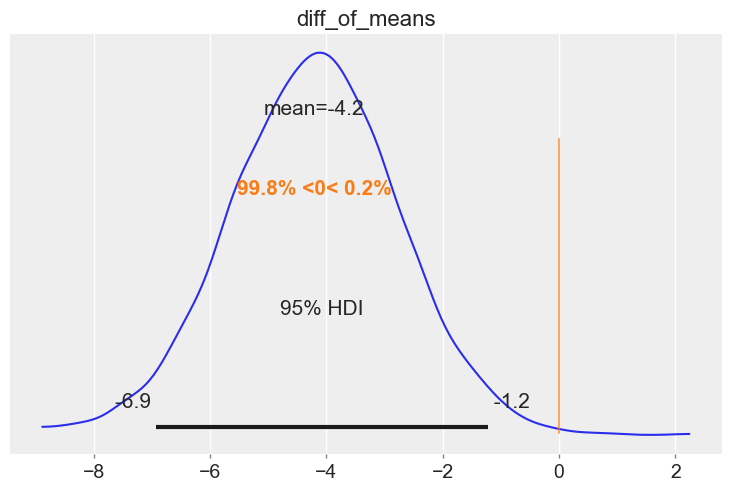

In [172]:
az.plot_posterior(normal_trace_2,  var_names="diff_of_means", ref_val=0, hdi_prob=0.95);

Even by selecting a very small value for $alpha$ we can see there is basically no chance the two means are the same, hinting that our hypothesis that NBA centers score less than the other positions, with the obvious limitations of us selecting only one player per role due to the computation time required for larger models.

## Posterior predictive check

C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


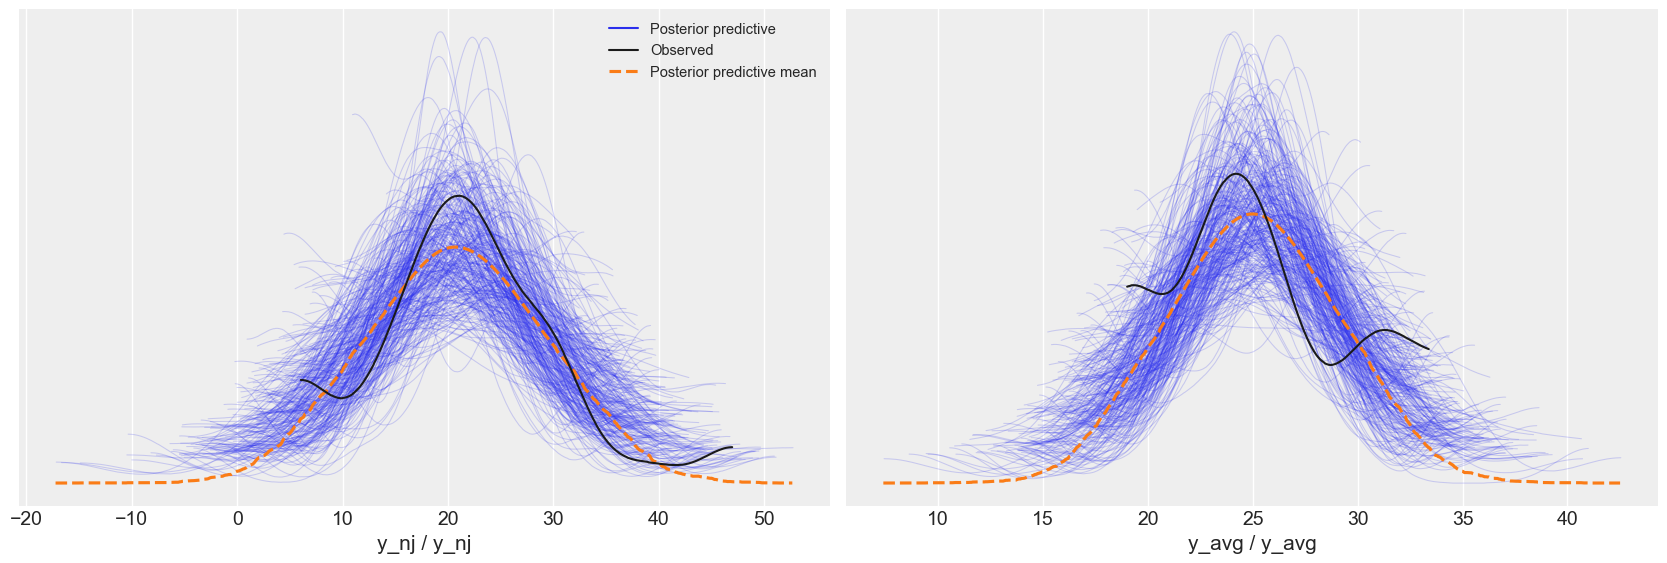

In [139]:
with normal_model_2:
     ppc = pm.sample_posterior_predictive(normal_trace_2, samples=300)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=normal_model_2));

The results look decent considering the approximations we made, but we are missing a bit of central density mass, so we also implement the student model to compare results.

## Robust likelihood
As mentioned by professor Corani in class, we default to the 4 degrees of freedom Student-t distribution for our robust model:

$$y_{\text{nj},i} \sim StudentT(\mu_{\text{nj}}, \sigma_{\text{nj}}, \nu=4)$$

$$y_{\text{avg},i} \sim StudentT(\mu_{\text{avg}}, \sigma_{\text{avg}},  \nu=4)$$

In [140]:
with pm.Model() as student_model:
    # priors
    mu_nj = pm.Normal('mu_nj', mu=9, sd=4)
    mu_avg = pm.Normal('mu_avg', mu=9, sd=4)
    sigma_nj = pm.HalfNormal('sigma_nj', sigma=6.8)
    sigma_avg = pm.HalfNormal('sigma_avg', sigma=6.8)

    # Robust likelihoods:
    y_nj = pm.StudentT ('y_nj', nu=4, mu=mu_nj, sd=sigma_nj, observed= points_nj)
    y_avg = pm.StudentT ('y_placebo', nu=4, mu=mu_avg, sd=sigma_avg, observed= points_avg)

    # deterministic variable of interest
    diff_of_means_t = pm.Deterministic('diff_of_means', mu_nj - mu_avg)

    # trace
    student_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_avg, sigma_nj, mu_avg, mu_nj]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 162 seconds.


In [141]:
az.summary(student_trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_nj,20.636,1.183,18.252,22.866,0.015,0.011,6193.0,2313.0,1.0
mu_avg,24.681,0.646,23.389,25.904,0.009,0.006,5589.0,2775.0,1.0
sigma_nj,6.427,0.961,4.648,8.311,0.013,0.009,5641.0,3186.0,1.0
sigma_avg,3.453,0.532,2.553,4.587,0.007,0.005,5975.0,3119.0,1.0
diff_of_means,-4.045,1.350,-6.597,-1.407,0.017,0.014,6347.0,2641.0,1.0


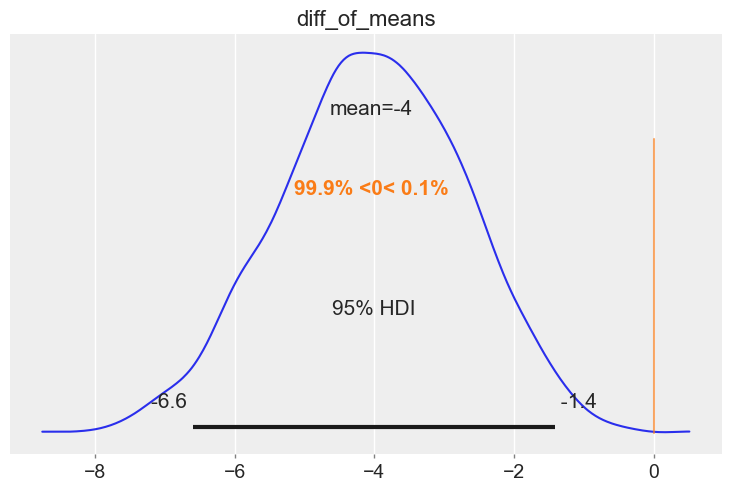

In [142]:
az.plot_posterior(student_trace, var_names="diff_of_means", ref_val=0, hdi_prob=0.95);

As expected the answer does not change qualitatively, and our hypothesis seems correct given the data. This is even more likely with a robust implementation of the likelihood functions.

## Predictive check

C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


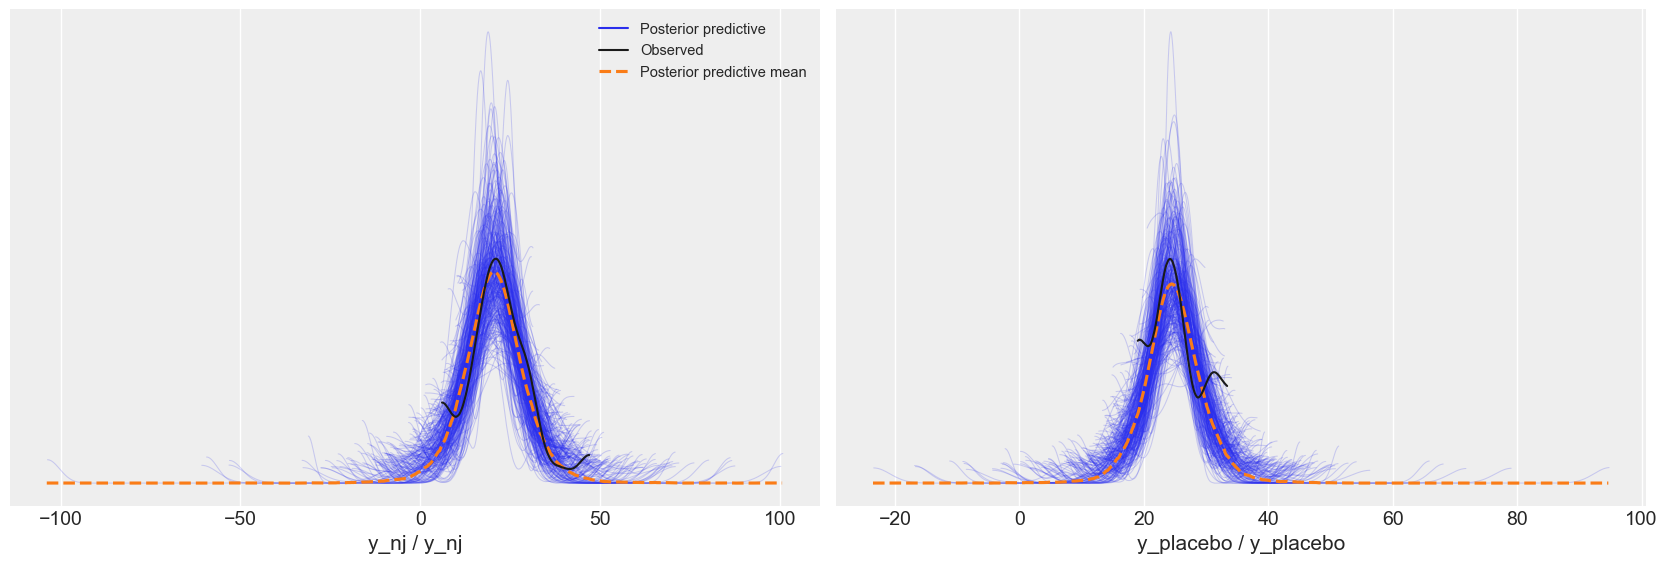

In [143]:
with student_model:
     ppc = pm.sample_posterior_predictive(student_trace, samples=300)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=student_model));

The fit is indeed much better with the robust likelihood.

## Prior sensitivity hypothesis 2

We added this for completeness, since prior sensitivity was a project requirement, although we do not expect it to be relevant.

In [173]:
with pm.Model() as  student_model_2_sensitivity:
    # priors
    # check uninformative priors with a large range.
    mu_nj = pm.Uniform('mu_nj', lower=0, upper=40)
    mu_avg = pm.Uniform('mu_avg', lower=0, upper=40)
    # model heavier tails with the half cauchy
    sigma_nj = pm.HalfCauchy('sigma_nj', beta=6.8)
    sigma_avg = pm.HalfCauchy('sigma_avg', beta=6.8)

    # Robust likelihoods:
    y_nj = pm.StudentT ('y_nj', nu=4, mu=mu_nj, sd=sigma_nj, observed= points_nj)
    y_avg = pm.StudentT ('y_placebo', nu=4, mu=mu_avg, sd=sigma_avg, observed= points_avg)

    # deterministic variable of interest
    diff_of_means_t = pm.Deterministic('diff_of_means', mu_nj - mu_avg)

In [174]:
# sample
with student_model_2_sensitivity:
    student_sensitivity_2_trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_avg, sigma_nj, mu_avg, mu_nj]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 189 seconds.


In [175]:
az.summary(student_sensitivity_2_trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_nj,21.663,1.178,19.419,24.001,0.015,0.011,5922.0,3087.0,1.0
mu_avg,25.091,0.652,23.928,26.510,0.009,0.007,5075.0,3004.0,1.0
sigma_nj,6.371,0.966,4.613,8.300,0.013,0.010,5720.0,2775.0,1.0
sigma_avg,3.459,0.522,2.514,4.499,0.007,0.005,5456.0,2687.0,1.0
diff_of_means,-3.428,1.354,-6.125,-0.864,0.019,0.014,5353.0,3261.0,1.0


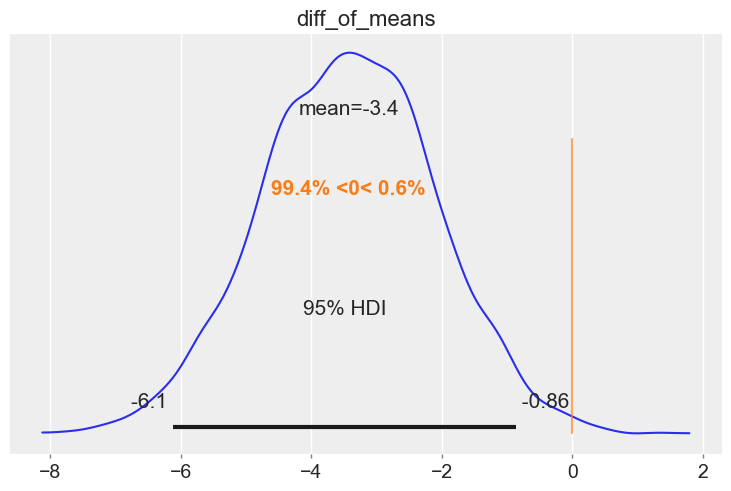

In [176]:
az.plot_posterior(student_sensitivity_2_trace, var_names="diff_of_means", ref_val=0, hdi_prob=0.95);

More uncertainty is being introduced, as expected from weak priors, but the answer stays the same.

C:\Users\light\OneDrive\Documents\Study\SUPSI\Year 3\bayesian_data_analysis_and_probabilistic_programming\coding\venv\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


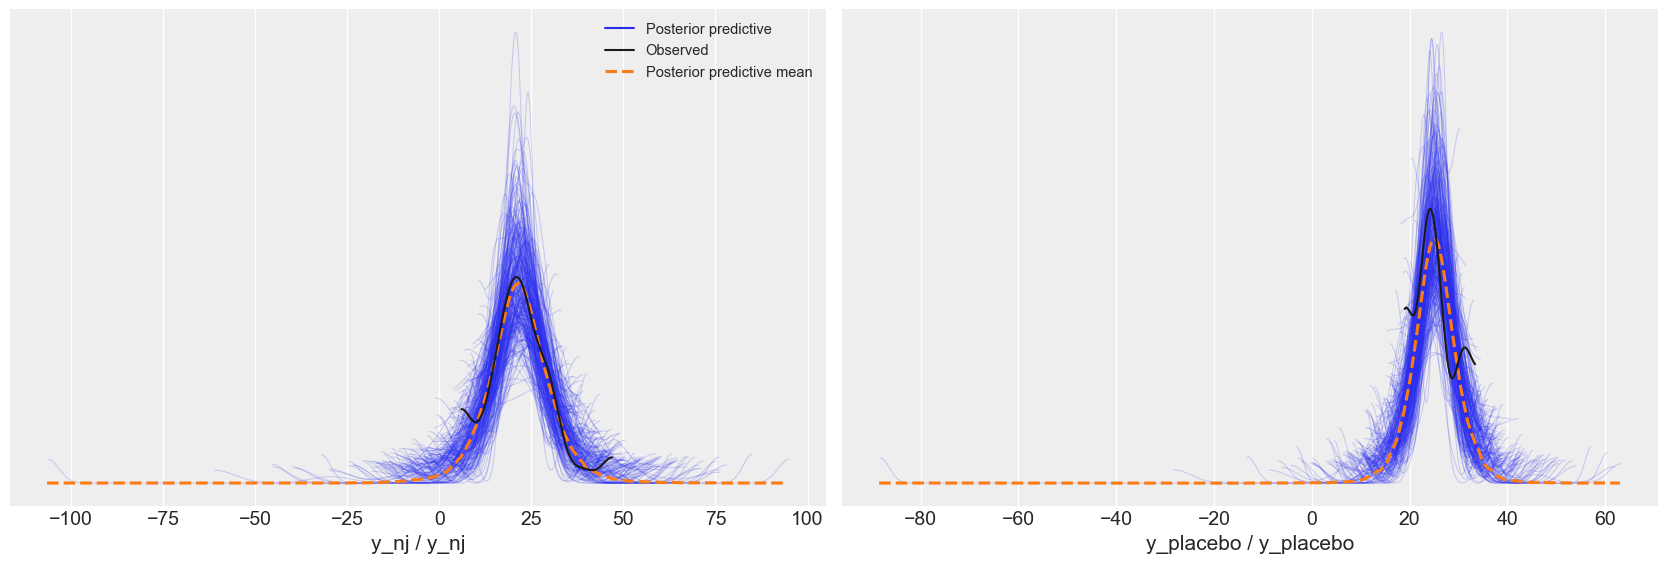

In [177]:
with student_model_2_sensitivity:
     ppc = pm.sample_posterior_predictive(student_sensitivity_2_trace, samples=300)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=student_model_2_sensitivity));